# **Analysis and Visualisations**

## Objectives

* Analyse how professional snooker has **internationalised since the 1980s.**
* Compute season-level **KPIs** and produce clear visuals for:
    * **International events**: Compare the number of UK and International tournaments.
    * **Players**: Analyse the number of international players per seasons and see how well they perform in each tournament
    * **Money**: Average prize money per event (UK vs Rest of World), has the prize pool become diluted?
* Explore correlations:
    * Number of International players per season ↔ Number of International Tournaments per season
    * International presence in late stages of tournament ↔ Rise in number of International Tournaments/Players
    * Rise in number of international tournaments ↔ Average prize pool per event
* Deliver static (Matplotlib/Seaborn) and interactive (Plotly) charts suitable for the final report.

## Inputs

* **Processed data from ETL (read-only in this notebook):**

  * `datasets/clean/master_cleaned.csv` (Master dataset, used for filtering and breaking down into smaller datasets)
  * `datasets/clean/triple_crown_events.csv`(Subset of the master data set only including triple crown events)
  * 


## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* **Definitions:**
  * **UK** = England, Scotland, Wales, Northern Ireland, and Ireland.
  * **International event** = tournament hosted outside the UK.
  * **International player** = nationality not in UK home nations.
  * **International Match** = One or more player's nationality is not in UK home nations.
  * **Late stage (QF+)** = Quarter Final, Semi Final, Final
  * **Triple Crown** = World Championship, UK Championship, Masters.

## Context

### A brief introduction to the history of snooker

Snooker is a **billiards** sport developed in the late 19th century by British Army officers stationed in India. The term *snooker* was army slang for a novice. After early variations, a standardised ruleset (including the respotted black) was adopted in **1919**.

In the 1920s, **Joe Davis**—an English professional—organised the first **World Snooker Championship (1926–27)** and then dominated the early era, winning **15 consecutive** titles before retiring unbeaten. Through these decades, snooker remained largely a club game with modest audiences.

The sport’s modern boom arrived with **colour television in the UK**. To showcase the new medium, the BBC launched the one-frame TV event ***Pot Black*** in the late 1960s, proving snooker’s TV appeal and paving the way for extensive coverage of the **World Championship**, **Masters**, and **UK Championship**—the **Triple Crown**—which the BBC still broadcasts.

#### Why early snooker was so UK-based

* **Administration and venues** were UK-centred; since **1977**, the World Championship has been staged at the **Crucible Theatre, Sheffield**, anchoring the sport’s pinnacle in Britain. ([wpbsa.com][1])
* **Broadcast economics** (notably the BBC) concentrated visibility and money in the **UK market**.
* The **player base and champions** were overwhelmingly from the **UK & Ireland**, reinforcing a domestic core.

#### Non-UK world champions

Depending on definition, there are **five (modern era)** non-UK winners:

* **Modern era / since the Crucible era**: **Cliff Thorburn** (Canada, 1980), **Neil Robertson** (Australia, 2010), **Luca Brecel** (Belgium, 2023), **Zhao Xintong** (China, 2025). ([Wikipedia][2], [Sky Sports][3])
* **Including pre-Crucible**: add **Horace Lindrum** (Australia, 1952). ([Wikipedia][4])

Notably, **Brecel in 2023** became the first champion from mainland Europe, and **Zhao Xintong in 2025** became the first Chinese (and Asian) world champion—two non-UK winners in the **last three completed championships**. ([The Guardian][5], [Sky Sports][3])

---

[1]: https://wpbsa.com/about-us/history/?utm_source=chatgpt.com "History Timeline | WPBSA | Snooker"
[2]: https://en.wikipedia.org/wiki/1980_World_Snooker_Championship?utm_source=chatgpt.com "1980 World Snooker Championship"
[3]: https://www.skysports.com/more-sports/snooker/news/12243/13349846/world-snooker-championship-2025-schedule-scores-and-results-from-the-crucible-ronnie-osullivan-judd-trump?utm_source=chatgpt.com "World Snooker Championship 2025 - Sky Sports"
[4]: https://en.wikipedia.org/wiki/World_Snooker_Championship?utm_source=chatgpt.com "World Snooker Championship"
[5]: https://www.theguardian.com/sport/live/2023/may/01/world-snooker-championship-crucible-2023-final-mark-selby-luca-brecel-live?utm_source=chatgpt.com "Luca Brecel defeats Mark Selby to win World Snooker Championship 2023 final - as it happened"


# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/stephenbeese/GitHub/Snooker-Data-Analysis/Snooker-Data-Analysis/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/Users/stephenbeese/GitHub/Snooker-Data-Analysis/Snooker-Data-Analysis'

# Imports and Variables

---

In [4]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

print("Imports complete")

Imports complete


In [5]:
# Set the file path for raw data
raw_data_dir = os.path.join(current_dir, 'datasets/raw')

# Set the file path for clean data
clean_data_dir = os.path.join(current_dir, 'datasets/clean')

# DataFrames
df_master = pd.read_csv(os.path.join(clean_data_dir, 'master_cleaned.csv'))
df_triple_crown = pd.read_csv(os.path.join(clean_data_dir, 'triple_crown_events.csv'))
df_tournaments = pd.read_csv(os.path.join(clean_data_dir, 'tournaments_cleaned.csv'))

print("DataFrames loaded")

DataFrames loaded


In [6]:
# Variables
UK_countries = ['UK', 'England', 'Scotland', 'Wales', 'Northern Ireland', 'Ireland']
triple_crown_events = ['World Championship', 'UK Championship', 'Masters']

# Rise in International Tournaments

In this section I am going to look at how the number of international tournaments has risen over the years.

This will be in comparison to the amount of UK tournaments held.

In [ ]:
# Filter tournaments to professional
df_tournaments_professional = df_tournaments[df_tournaments['status'] == 'Professional']

# Display the DataFrame
df_tournaments_professional.head()

,id,season,year,name,full_name,status,category,prize,country
0,753,1982-1983,1982,UK Championship,1982 UK Championship,Professional,Non-ranking,47000.0,England
2,762,1982-1983,1982,Professional Players Tournament,1982 Professional Players Tournament,Professional,Ranking,31500.0,England
4,754,1982-1983,1982,International Open,1982 International Open,Professional,Ranking,73500.0,England
5,759,1982-1983,1982,Scottish Masters,1982 Scottish Masters,Professional,Invitational,23000.0,Scotland
10,795,1982-1983,1982,Australian Masters,1982 Australian Masters,Professional,Invitational,18568.0,Australia


In [9]:
# Group by season, country, and tournament name
df_tournaments_professional.groupby(['season', 'country', 'name']).size().reset_index(name='count').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   season   916 non-null    object
 1   country  916 non-null    object
 2   name     916 non-null    object
 3   count    916 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 28.8+ KB


In [84]:
# Sort df_tournaments_professional by season
df_tournaments_professional_by_season = df_tournaments_professional.sort_values(by='season')

# Group professional tournaments by season
df_tournaments_professional_by_season_count = df_tournaments_professional_by_season.groupby(['season']).size().reset_index(name='count')

df_tournaments_professional_by_season_count.head(10)

,season,count
0,1981-1982,13
1,1982-1983,16
2,1983-1984,19
3,1984-1985,24
4,1985-1986,31
5,1986-1987,31
6,1987-1988,27
7,1988-1989,32
8,1989-1990,27
9,1990-1991,21


---

# Section 1 - Tournaments held in the UK vs the Rest of the World

---

## Plot 1 - Number of Professional Tournaments by Season (Matplotlib)

The plot below shows the evolution of the number of professional tournaments.

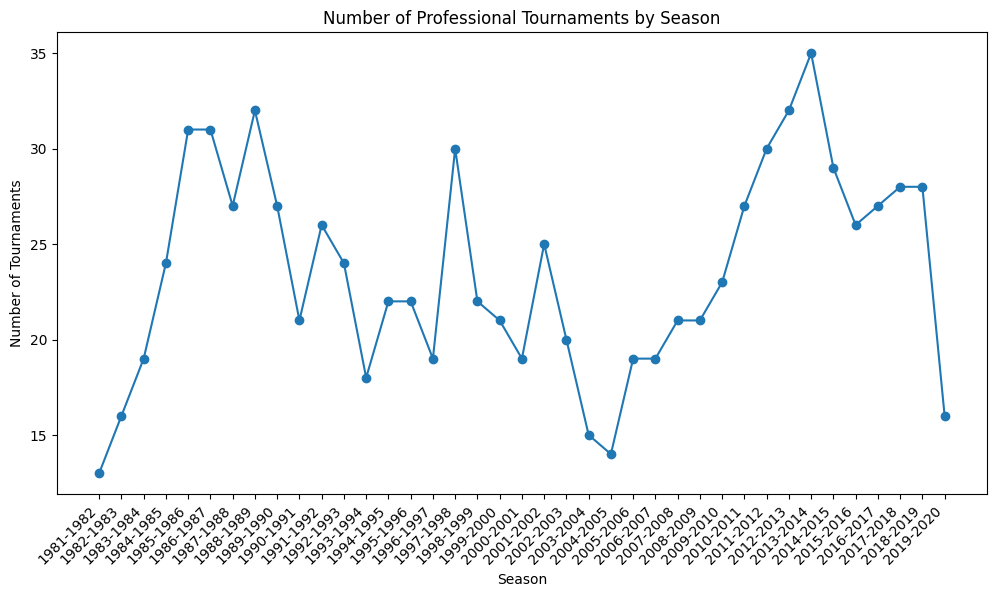

In [12]:
# Plot number of professional tournaments by season
plt.figure(figsize=(12,6))
plt.title('Number of Professional Tournaments by Season')
plt.xlabel('Season')
plt.ylabel('Number of Tournaments')
plt.xticks(rotation=45, ha='right')
plt.plot(df_tournaments_professional_by_season_count['season'], df_tournaments_professional_by_season_count['count'], marker='o')
plt.show()

**As we can see from the line graph the number of professional tournaments have changed quite dramatically over the years.**

**Some insights we can gain from this graph are:**

### 1.Rapid Growth in the 1980s
* The sport saw a sharp rise in the 1980s, peaking at just over 30 tournaments in the 1985-1986 and 1986-1987 season
* This could reflect snooker's boom in popularity after the introduction of colour TV and BBC coverage of Pot Black and Triple Crown Events.

### 2. Fluctuations in the 1990s
* After the peak in the late 80s, there's a clear decline through the early to mid 90s

### 3. Low Point in the Mid 2000s
* Around 2005-2006 the number of tournaments dipped to lowest level since the 1980s
* This period is often associated with administrative issues in snooker and the lack of global expansion efforts.

### 4. Resurgence in the 2010s
* A strong growth phase starting from the 2004-2005 season, peaking at 35 tournaments around 2014-2015
* During this period Barry Hearn's leadership of World Snooker saw the expansion of the professional tour introducing more ranking events and overseas tournaments.

### 5. Stabilisation and Possible Decline
* After the peak in mid 2010s, tournament numbers settle into the mid 20s
* the drop in tournaments in the 2019-2020 season is likely due to the COVID-19 pandemic disrupting the calendar

---

# Plot 2 - Comparison of UK and Rest of World Tournaments (1982-2020)
## Pie Chart (Matplotlib)

The plot below shows the distibution between tournaments held in the UK vs outside of the UK from 1982 - 2020

First we need to group the tournaments into UK or Rest of World, we then count how many of each were held by season

In [16]:
# Get the count of UK tournaments and Rest of World tournaments
df_tournaments_professional_by_season['country'] = df_tournaments_professional_by_season['country'].apply(lambda x: 'UK' if x in UK_countries else 'Rest of World')
df_tournaments_professional_by_season_country = df_tournaments_professional_by_season.groupby(['season', 'country']).size().reset_index(name='count')

df_tournaments_professional_by_season_country.head(6)

,season,country,count
0,1981-1982,UK,13
1,1982-1983,Rest of World,1
2,1982-1983,UK,15
3,1983-1984,Rest of World,4
4,1983-1984,UK,15
5,1984-1985,Rest of World,9


The following code then sums the total number of tournaments held in the UK and Rest of World across all seasons.

In [77]:
tournament_totals = (
    df_tournaments_professional_by_season_country
    .assign(count=pd.to_numeric(df_tournaments_professional_by_season_country["count"], errors="coerce").fillna(0))
    .groupby("country", as_index=False)["count"].sum()
    .rename(columns={"count": "total_tournaments"})
)

tournament_totals

,country,total_tournaments
0,Rest of World,278
1,UK,641


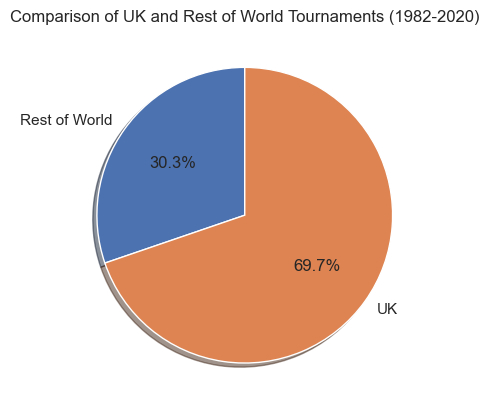

In [ ]:
# Plot all time tournaments UK vs Rest of the World
fig, ax = plt.subplots()
ax.pie(tournament_totals['total_tournaments'], labels=tournament_totals['country'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Comparison of UK and Rest of World Tournaments (1982-2020)")
plt.show()

### From the pie chart we can gather some interesting insights

### 1. UK Dominance in Hosting
* 69.7% of tournaments in this period were hosted in the UK.
* This reflects snooker’s historical roots as a UK-centric sport, with the majority of events concentrated in Britain for decades.

### 2. Limited International Spread
* Only 30.3% of tournaments were held outside the UK.
* Considering that this is a nearly 40-year span, it suggests that meaningful global expansion has been relatively slow or happened in recent years.

### 3. Potential Shift in Later Years
* Relating this pie chart to the tournaments line chart, it is likely that international tournaments increased in later years as the number of tournaments grew significantly in the 2010s
* This is something we will look at in our next chart

---

# Plot 3 - Professional Tournaments by Season (UK vs Rest of World)

The plot below shows the comparison of UK held tournaments vs the International tournaments

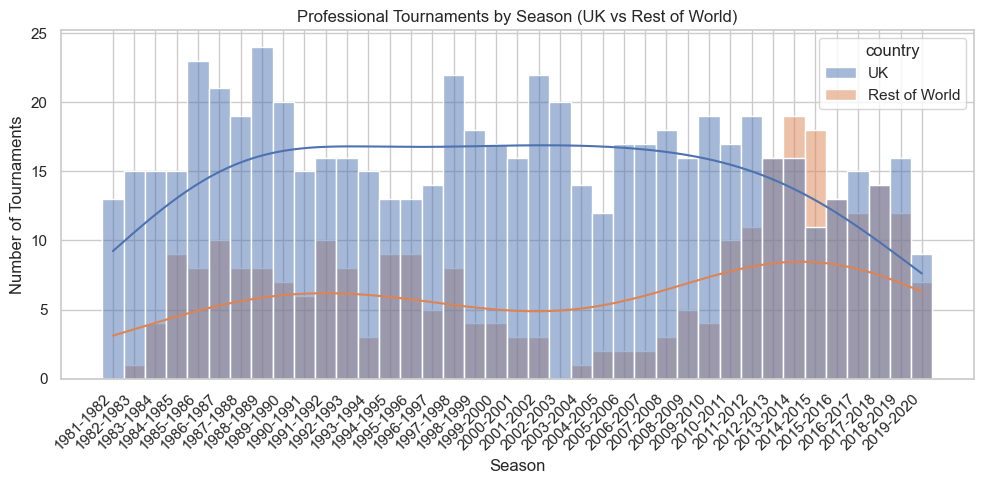

In [90]:
# Plot number of tournaments by season (UK vs Rest of World)
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df_tournaments_professional_by_season_country, x="season", weights="count", hue="country", kde=True
)
plt.title("Professional Tournaments by Season (UK vs Rest of World)")
plt.xlabel("Season")
plt.ylabel("Number of Tournaments")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Some interesting insights we can gain from this are:

### 1. UK dominance
* The dominance of UK tournaments across the entire period is clear to see. In almost every season, the UK hosts more than double the number of tournaments compared to the Rest of the World

### 2. 1980s to early 1990s
* The UK enjoyed a golden era, peaking at over 20 events per season, while Rest of World tournaments rarely exceeded 6.

### 3. Mid-1990s to early 2000s:
* UK tournament numbers fell noticeably, but the Rest of World did not fill that gap — the gap remained large.

### 4. 2010s expansion
* Since the 2009-2010 season International tournaments have seen their most significant growth, even surpassing UK held tournaments in the 2013-2014 and 2014-2015 season.
* The trend still shows that UK tournaments are still dominant however there is a clear growth in the sport globally

---

## Section 1 - Conclusion
The UK is clearly the dominant figure in terms of hosting tournaments but there has always been international tournaments held in some capacity and that number has increased significantly since the 2010s.

We are going to look at some potential reasons behind the growth of the sport internationally in the upcoming sections.


---
# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [14]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (553063055.py, line 5)